NOTE: 

PERIOD - jul 01 2016 - jun 30 2018

C10 uses a cap ceiling of 0.15 - can be changed

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [2]:
#DATA PREPARATION
data = np.load('/Users/louisribieras/Desktop/Invictus/Data/latest_coin_data.pkl')
#drop null data
data = data.dropna()


#convert all dates to datetime dates
#data.columns = pd.to_datetime(data.columns).date

NOTE: Not converting to datetime.date because format not compatible with slicing, code for datetime left above

In [3]:
def share_cap_recurse(market_cap_list, num_coins, cap_ceiling_amount, final_cap_list):

    not_realloc_val = 0

    realloc_val = 0

    num_final = 0

    new_market_cap_list = []

    

    for i in range(0, len(market_cap_list)):

        if(market_cap_list[i] > cap_ceiling_amount):

            final_cap_list.append(cap_ceiling_amount)

            realloc_val += market_cap_list[i] - cap_ceiling_amount

            num_final += 1

        else:

            not_realloc_val += market_cap_list[i]

     

    if(num_final!=0):

        new_market_cap_list = [x * (1+(realloc_val/not_realloc_val)) for x in market_cap_list[num_final:]]

    else:

        new_market_cap_list = deepcopy(market_cap_list)

    

    if len(final_cap_list) == num_coins:

        return

    elif (new_market_cap_list[0] <= cap_ceiling_amount): #assumes ordered desc in market cap

        for cap in new_market_cap_list:

            final_cap_list.append(cap)

        return       

    else:

        share_cap_recurse(new_market_cap_list, num_coins, cap_ceiling_amount, final_cap_list)

        

def share_cap(market_cap_list, cap_ceiling_percent):  #CHANGE CAP CEILING HERE

    total_cap = sum(market_cap_list)

    cap_ceiling_amount = total_cap * cap_ceiling_percent

    final_cap_list = []

    

    share_cap_recurse(market_cap_list, len(market_cap_list), cap_ceiling_amount, final_cap_list)

    

    return (final_cap_list)

Backtest function: pass data, the start and end date, rebalancing duration and top number of coins you require)

In [4]:
close_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        close_list.append(data[column][date]['close_price'])

# Splitting list into 133 lists (one per coin)
close_list2 = [close_list[i:i+916] for i  in range(0, len(close_list), 916)]

# Make an array
close_ar = np.asarray(close_list2)

# Make Close DataFrame
close_df = pd.DataFrame(data = close_ar, index = data.index, columns = data.columns)
close_df = close_df[close_df.columns[::-1]]

In [5]:
# Initialize a market_cap list
market_list = list()
# Making a list of all market_cap
for date in data.index:
    for column in data.columns:
        market_list.append(data[column][date]['market_cap'])

# Splitting list into 133 lists (one per coin)
market_list2 = [market_list[i:i+916] for i  in range(0, len(market_list), 916)]

# Make an array
market_ar = np.asarray(market_list2)
    
# Make Market Cap DataFrame
market_df = pd.DataFrame(data = market_ar, index = data.index, columns = data.columns)
market_df = market_df[market_df.columns[::-1]]

In [6]:
#Selecting data for startdate to enddate
selectedmarket = market_df.loc[:, 'Jul 01, 2016':'Jun 30, 2018':7]
selectedclose = close_df.loc[:, 'Jul 01, 2016':'Jun 30, 2018':7]

#NOTE ENDDATE ISSUE

In [7]:
#Generating returns dataframe
selectedclose1 = selectedclose.copy().T
selectedreturns = selectedclose1.pct_change(1).T
selectedreturns.head()

,"Jul 01, 2016","Jul 08, 2016","Jul 15, 2016","Jul 22, 2016","Jul 29, 2016","Aug 05, 2016","Aug 12, 2016","Aug 19, 2016","Aug 26, 2016","Sep 02, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
1337coin,NaN,-0.222222,0.857143,-0.461538,0.000000,-0.142857,0.000000,1.000000,-0.416667,-0.142857,...,0.120253,-0.124294,-0.154839,-0.198473,-0.161905,0.056818,-0.172043,-0.116883,0.000000,-0.088235
advanced-internet-blocks,NaN,-0.486328,-0.299886,-0.214474,0.003106,0.108875,-0.196138,0.119537,-0.119183,-0.343998,...,-0.339360,-0.075841,0.272702,-0.032351,-0.205862,-0.241061,-0.119301,0.680328,0.422850,-0.553230
adzcoin,NaN,-0.127372,-0.114262,0.097837,-0.043943,-0.132533,-0.027587,0.020252,-0.010555,0.137250,...,-0.315110,-0.157660,-0.147461,0.046833,-0.191053,0.082864,-0.082620,0.045061,0.408367,-0.225371
aeon,NaN,0.062529,0.733699,-0.055636,-0.035838,-0.175205,0.282428,0.058394,0.513744,3.839793,...,-0.129630,0.047872,-0.142132,0.118343,-0.174603,0.076923,-0.029762,-0.110429,-0.179310,-0.025210
anarchistsprime,NaN,0.392650,0.006944,-0.057931,0.150805,-0.223919,-0.018033,0.535893,-0.226087,0.301966,...,-0.080983,0.189094,-0.485092,0.116153,0.452063,-0.151483,0.070918,-0.184870,-0.112271,-0.369876


In [8]:
cols = selectedreturns.columns[:-1]
selectedreturns = selectedreturns.drop('Jul 01, 2016', 1)
selectedreturns.columns = cols

In [9]:
#BTC DATAFRAME
bitcoin = data.T['bitcoin'].apply(pd.Series)
bitcoin = pd.DataFrame(data= bitcoin['close_price'], index = bitcoin.index)
bitcoin = bitcoin.T
bitcoin = bitcoin[bitcoin.columns[::-1]] #reversing the dataframe
selectedbtc = bitcoin.loc[:, 'Jul 01, 2016':'Jun 30, 2018':7] #selection period
selectedbtc1 = selectedbtc.copy().T
btcreturns = selectedbtc1.pct_change(1).T
#btcreturns.head()
#btccols = btcreturns.columns[:-1]
#btcreturns = btcreturns.drop('Jul 01, 2016', 1)
#btcreturns.columns = btccols
btcreturns = btcreturns.T
btc_final_cum = (1 + btcreturns).cumprod()
btc_final_cum.index = pd.to_datetime(btc_final_cum.index)
btc_final_cum.at['2016-07-01', 'close_price'] = 1

In [10]:
btc_final = btcreturns.merge(btc_final_cum, how='outer', left_index=True, right_index=True)
btc_final.columns = ['weekly returns', 'cumulative returns']

In [11]:
btc_final.head()

,weekly returns,cumulative returns
2016-07-01,NaN,1.000000
2016-07-08,-0.014461,0.985539
2016-07-15,-0.004906,0.980704
2016-07-22,-0.019043,0.962029
2016-07-29,0.009791,0.971448


In [12]:
btc_test = pd.read_csv("/home/isabelle/My Invictus/btc_final")
btc_test.head()

FileNotFoundError: File b'/home/isabelle/My Invictus/btc_final' does not exist

In [13]:
btc_final.to_csv("btc_final")

In [14]:
selectedmarket.head()

,"Jul 01, 2016","Jul 08, 2016","Jul 15, 2016","Jul 22, 2016","Jul 29, 2016","Aug 05, 2016","Aug 12, 2016","Aug 19, 2016","Aug 26, 2016","Sep 02, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
1337coin,24415,25635,57843,32487,71675,70291,52333,71290,92498,48898,...,4.33022e+06,4.97932e+06,3.69302e+06,2.68519e+06,2.26017e+06,2.21422e+06,3.34596e+06,1.97734e+06,2.06235e+06,1.52037e+06
advanced-internet-blocks,None,None,None,None,None,None,None,None,None,None,...,128731,141451,264903,101552,108478,84521,74292,105276,192632,107505
adzcoin,57023,49125,53106,57853,59508,54371,572085,587405,595106,655804,...,1.14482e+06,973339,834312,793873,710886,694336,748578,813747,1.24173e+06,842958
aeon,130124,123313,172570,198781,197097,195100,200303,280414,354332,1.47904e+06,...,2.99624e+07,3.08168e+07,3.14432e+07,2.98702e+07,2.42244e+07,2.66253e+07,2.57734e+07,2.21901e+07,2.12614e+07,1.78694e+07
anarchistsprime,1910,3305,2742,2628,2753,2411,2300,3087,2580,3778,...,31701,25975,14643,10651,14624,17779,19245,16059,15345,9027


In [15]:
#Total Market Cap DATAFRAME
TMC = pd.DataFrame (data= selectedmarket.sum(axis=0), index = selectedmarket.columns)
TMC.columns = ['total_market_cap']
TMC = TMC.pct_change(1).T
TMC = TMC.T
TMC_final_cum = (1 + TMC).cumprod()
TMC_final_cum.index = pd.to_datetime(TMC_final_cum.index)
TMC_final_cum.at['2016-07-01', 'total_market_cap'] = 1



In [16]:
TMC_final = TMC.merge(TMC_final_cum, how='outer', left_index=True, right_index=True)
TMC_final.columns = ['weekly change', 'cumulative change']

In [17]:
TMC_final.to_csv('total_market_cap_final.csv')

In [18]:
TMC_final.head()

,weekly change,cumulative change
2016-07-01,NaN,1.000000
2016-07-08,-0.057749,0.942251
2016-07-15,0.038748,0.978761
2016-07-22,0.016881,0.995284
2016-07-29,-0.013492,0.981856


In [19]:
TMC_test = pd.read_csv("/home/isabelle/My Invictus/total_market_cap_final.csv")
TMC_test.head()

FileNotFoundError: File b'/home/isabelle/My Invictus/total_market_cap_final.csv' does not exist

In [21]:
#FOR LOOP FOR C10
topmc10 = {}
sc10 = {}
tc10 = {}
ps10 = {}
invest10 = {}
returns10 = {}
lg_returns10 = {}
selectedmc10 = {}
topcoins10 = {}

#for every date
for column in selectedmarket:
    #sort in descending order
    selectedmc10[column] = selectedmarket[column].sort_values(ascending=False)
    
    #take the top coins
    topmc10[column] = selectedmc10[column].head(10)
    #take the index of the top coins
    topcoins10[column] = topmc10[column].index
    
    #get the share cap of the top 20
    sc10[column] = share_cap(topmc10[column], 0.15)
    
    #total cap of top 20
    tc10[column] = sum(sc10[column])
    
    #percentage share to be allocated for top 20
    ps10[column] = [x / tc10[column] for x in sc10[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest10[column] = pd.DataFrame()
    invest10[column] = pd.DataFrame({'coin': topcoins10[column], 'pct_share': ps10[column]})
    invest10[column] = invest10[column].set_index('coin')
        
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in selectedreturns:
        returns10[column] = pd.DataFrame()
        returns10[column] = pd.DataFrame({'returns': selectedreturns[column]})
        returns10[column] = returns10[column].loc[topcoins10[column]]
        
     #for loop to generate portfolio returns for a particular week
    portfolio_simple_returns10 = {}
    portfolio_total_returns10 = list()

    for i, df in invest10.items():
        portfolio_simple_returns10[i] = invest10[i].transpose().dot(returns10[i])
        portfolio_total_returns10.append(portfolio_simple_returns10[i]['returns'])      

KeyError: 'Jun 29, 2018'

In [22]:
#FOR C10 compiling and cleaning the table into a readable format
final_portfolio_simple_returns10 = pd.DataFrame(portfolio_total_returns10) 
final_portfolio_simple_returns10.columns = ['weekly_portfolio_simple_returns']
final_portfolio_simple_returns10['date'] = selectedreturns.T.index
final_portfolio_simple_returns10 = final_portfolio_simple_returns10.set_index('date')

#converting to datetime
final_portfolio_simple_returns10.index = pd.to_datetime(final_portfolio_simple_returns10.index)

In [23]:
final_portfolio_simple_returns10.head(5)

,weekly_portfolio_simple_returns
date,
2016-07-01,-0.047639
2016-07-08,0.006550
2016-07-15,-0.003303
2016-07-22,-0.036450
2016-07-29,-0.057386


In [57]:
#FOR C10 
final_cum10 = (1 + final_portfolio_simple_returns10).cumprod()
final_cum10.index = pd.to_datetime(final_cum10.index)

In [58]:
final_C10 = final_portfolio_simple_returns10.merge(final_cum10, how='outer', left_index=True, right_index=True)
final_C10.columns = ['weekly_simple_returns', 'cumulative_returns']
ts = pd.to_datetime("2018-06-29", format="%Y-%m-%d")
new_row = pd.DataFrame([[None, 1]], columns = ['weekly_simple_returns', 'cumulative_returns'], index=[ts])
final_C10 = pd.concat([final_C10, pd.DataFrame(new_row)], ignore_index=False)
final_C10.weekly_simple_returns = final_C10.weekly_simple_returns.shift(1)
final_C10.cumulative_returns = final_C10.cumulative_returns.shift(1)
final_C10.at['2016-07-01', 'cumulative_returns'] = 1


In [85]:
final_C10.tail()

,weekly_simple_returns,cumulative_returns
2018-06-01,-0.006794,59.176639
2018-06-08,0.017892,60.235406
2018-06-15,-0.177612,49.536852
2018-06-22,-0.088177,45.168843
2018-06-29,-0.034735,43.599922


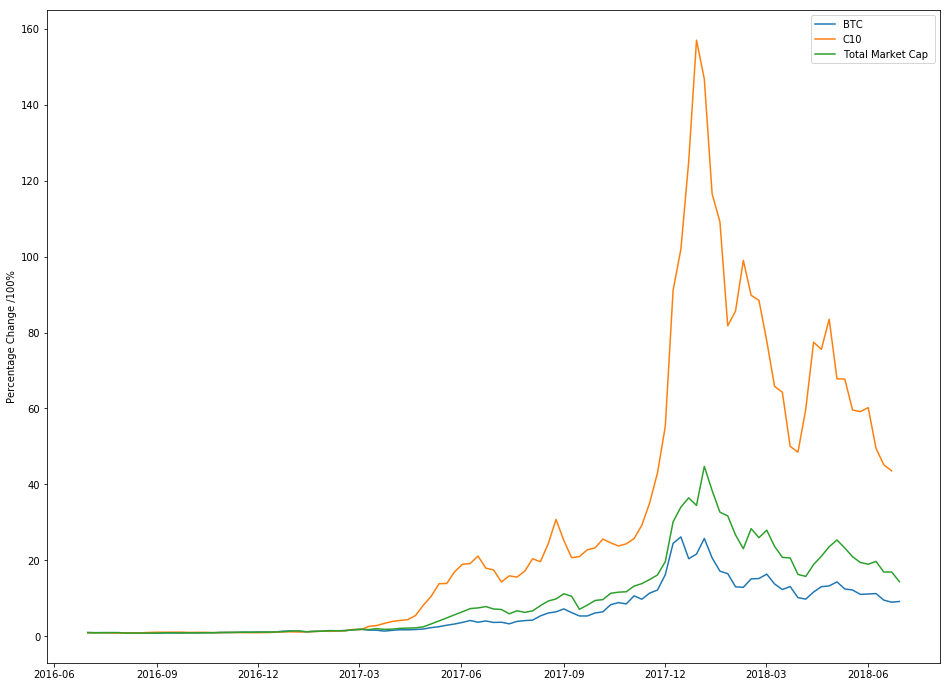

In [114]:
#graphing portfolio returns
fig, (ax1) = plt.subplots(1, 1, figsize=(16,12))

ax1.set_ylabel('Percentage Change /100%')

ax1.plot(btc_final_cum.index, btc_final_cum, label='BTC')
ax1.plot(final_cum10.index, final_cum10, label='C10')
ax1.plot(TMC_final_cum.index, TMC_final_cum, label='Total Market Cap ')

ax1.legend()

plt.show()

In [ ]:
SCRAP BELOW

In [59]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = selectedmarket.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = final_cum['weekly_portfolio_simple_returns'].iloc[-1]
    # Average portfolio return assuming compunding of returns
    #average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')

Total portfolio return is: 12315.21%


In [97]:
#FOR LOOP
topmc = {}
sc = {}
tc = {}
ps = {}
invest = {}
returns = {}
lg_returns = {}
selectedmc = {}
topcoins = {}

#for every date
for column in selectedmarket:
    #sort in descending order
    selectedmc[column] = selectedmarket[column].sort_values(ascending=False)
    
    #take the top coins
    topmc[column] = selectedmc[column].head(20)
    #take the index of the top coins
    topcoins[column] = topmc[column].index
    
    #get the share cap of the top 20
    sc[column] = share_cap(topmc[column], 0.1)
    
    #total cap of top 20
    tc[column] = sum(sc[column])
    
    #percentage share to be allocated for top 20
    ps[column] = [x / tc[column] for x in sc[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest[column] = pd.DataFrame()
    invest[column] = pd.DataFrame({'coin': topcoins[column], 'pct_share': ps[column]})
    invest[column] = invest[column].set_index('coin')
        
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in selectedreturns:
        returns[column] = pd.DataFrame()
        returns[column] = pd.DataFrame({'returns': selectedreturns[column]})
        returns[column] = returns[column].loc[topcoins[column]]
        
     #for loop to generate portfolio returns for a particular week
    portfolio_simple_returns = {}
    portfolio_total_returns = list()

    for i, df in invest.items():
        portfolio_simple_returns[i] = invest[i].transpose().dot(returns[i])
        portfolio_total_returns.append(portfolio_simple_returns[i]['returns'])         

In [101]:
#compiling and cleaning the table into a readable format
final_portfolio_simple_returns = pd.DataFrame(portfolio_total_returns) 
final_portfolio_simple_returns.columns = ['weekly_portfolio_simple_returns']
final_portfolio_simple_returns['date'] = selectedreturns.T.index
final_portfolio_simple_returns = final_portfolio_simple_returns.set_index('date')

In [102]:
final_cum = (1 + final_portfolio_simple_returns).cumprod()